# LIME Explainability for FinBERT

This notebook demonstrates LIME (Local Interpretable Model-agnostic Explanations) integration for explaining FinBERT sentiment predictions.

**FYP-159: Integrate LIME for sample analysis**

In [11]:
# Force reload modules to pick up latest changes
import importlib
import sys
from pathlib import Path

# Add backend to path first (if not already added)
backend_path = str(Path.cwd().parent / "backend")
if backend_path not in sys.path:
    sys.path.insert(0, backend_path)

# Reload the LIME explainer module
if 'app.explainability.lime_explainer' in sys.modules:
    importlib.reload(sys.modules['app.explainability.lime_explainer'])
if 'app.explainability' in sys.modules:
    importlib.reload(sys.modules['app.explainability'])
if 'app.models.finbert_model' in sys.modules:
    importlib.reload(sys.modules['app.models.finbert_model'])

print("✓ Modules reloaded successfully!")

✓ Modules reloaded successfully!


## Setup

In [12]:
import sys
from pathlib import Path

# Add backend to path
sys.path.insert(0, str(Path.cwd().parent / "backend"))

from app.explainability import LIMEExplainer, get_lime_explainer
from app.explainability.visualizations import (
    plot_lime_features,
    plot_lime_summary_bar,
    plot_lime_class_comparison,
    save_lime_html,
)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

## Initialize LIME Explainer

In [13]:
# Initialize LIME explainer (singleton pattern)
explainer = get_lime_explainer(num_features=10, num_samples=1000)
print("LIME explainer initialized successfully!")

LIME explainer initialized successfully!


## Example 1: Positive Sentiment

In [14]:
text_positive = "Stock prices surged to record highs as investors celebrated strong earnings"

# Generate explanation
explanation_pos = explainer.explain(text_positive, num_features=10)

# Display prediction
pred = explanation_pos["prediction"]
print(f"Text: {text_positive}")
print(f"Prediction: {pred['label'].upper()} ({pred['score']:.1%} confidence)")
print(f"\nTop features:")
for feature, weight in explanation_pos["top_features"][:5]:
    print(f"  {feature}: {weight:+.4f}")

Text: Stock prices surged to record highs as investors celebrated strong earnings
Prediction: POSITIVE (68.6% confidence)

Top features:
  strong: +0.2403
  surged: +0.1259
  to: +0.1051
  as: +0.0900
  earnings: +0.0645


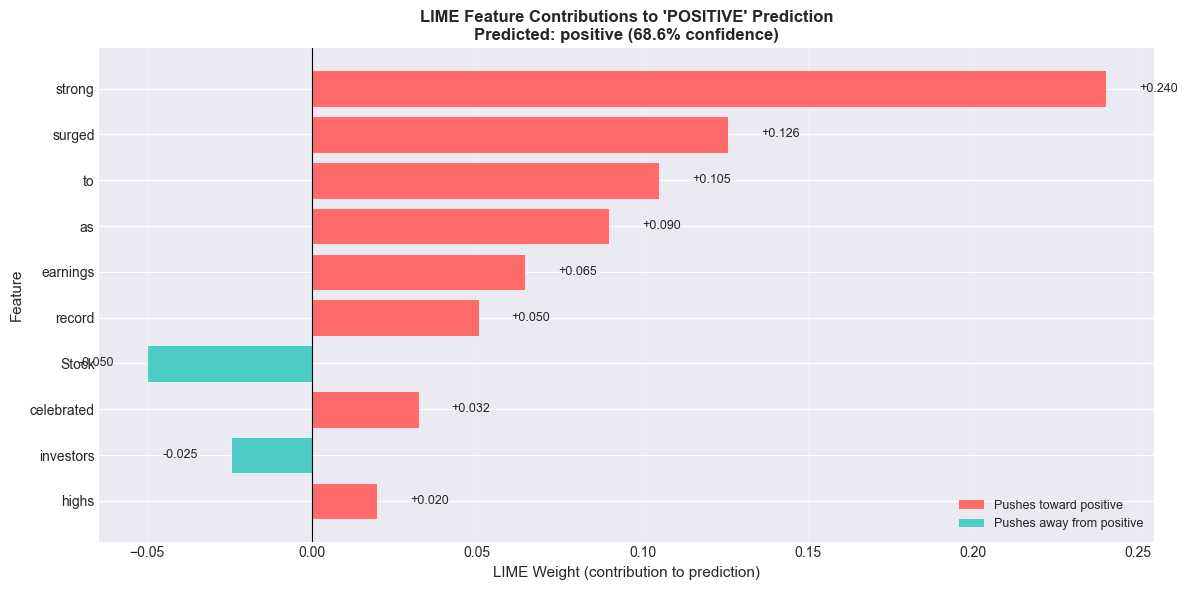

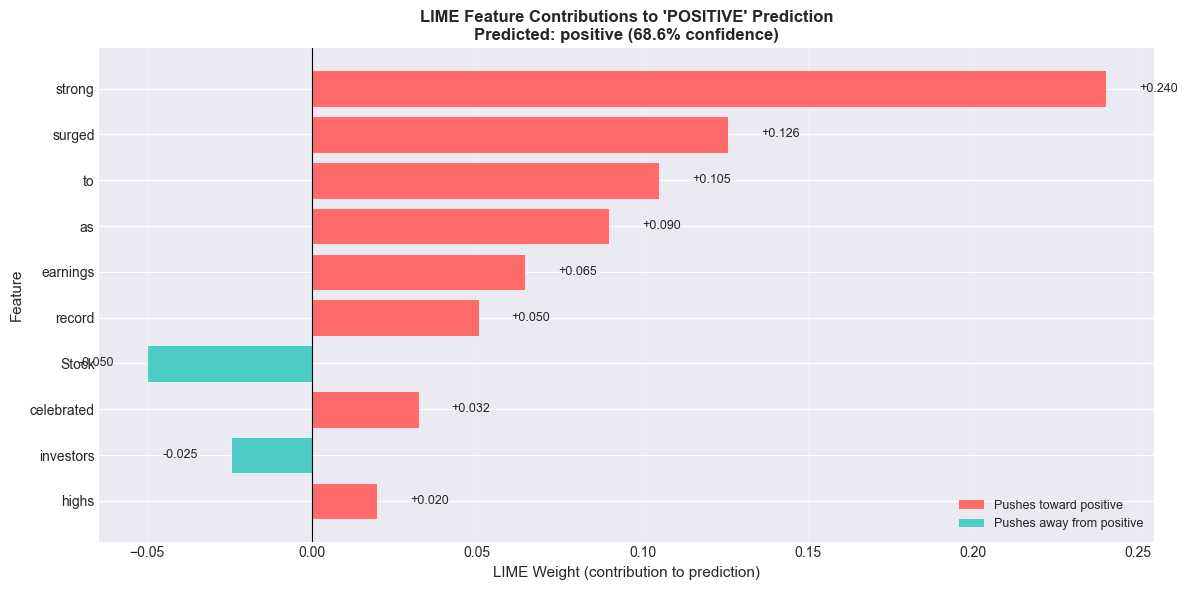

In [15]:
# Visualize
plot_lime_features(explanation_pos, figsize=(12, 6))

## Example 2: Negative Sentiment

In [16]:
text_negative = "Markets crashed following disappointing employment figures and weak economic indicators"

# Generate explanation
explanation_neg = explainer.explain(text_negative, num_features=10)

# Display prediction
pred = explanation_neg["prediction"]
print(f"Text: {text_negative}")
print(f"Prediction: {pred['label'].upper()} ({pred['score']:.1%} confidence)")
print(f"\nTop features:")
for feature, weight in explanation_neg["top_features"][:5]:
    print(f"  {feature}: {weight:+.4f}")

Text: Markets crashed following disappointing employment figures and weak economic indicators
Prediction: NEGATIVE (97.1% confidence)

Top features:
  weak: +0.3185
  disappointing: +0.2606
  figures: +0.1077
  following: +0.0978
  employment: +0.0741


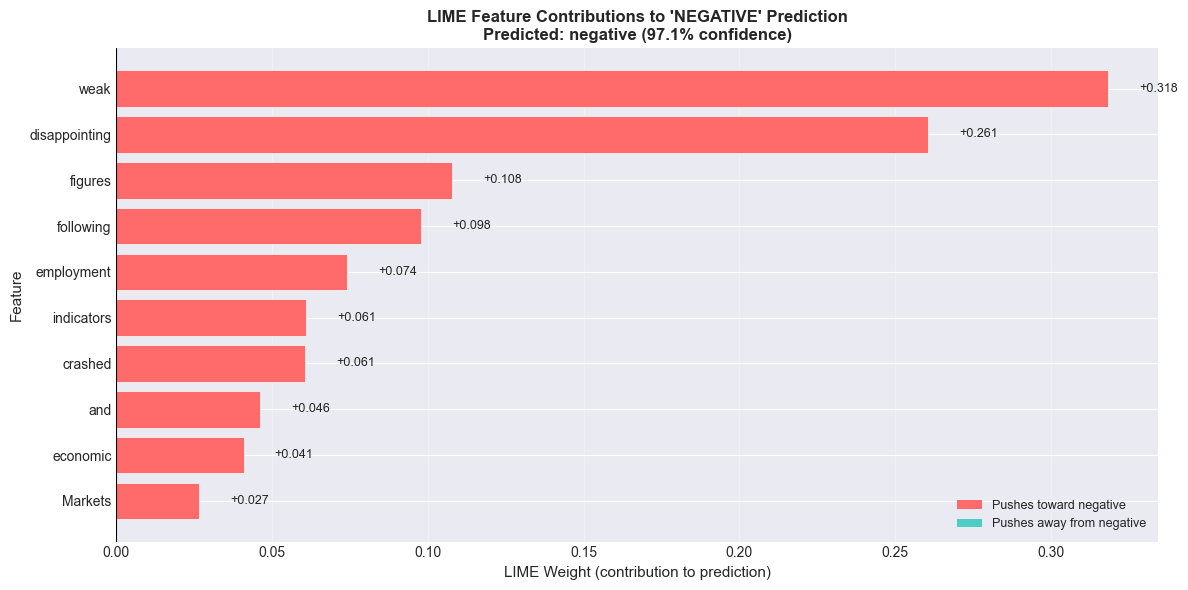

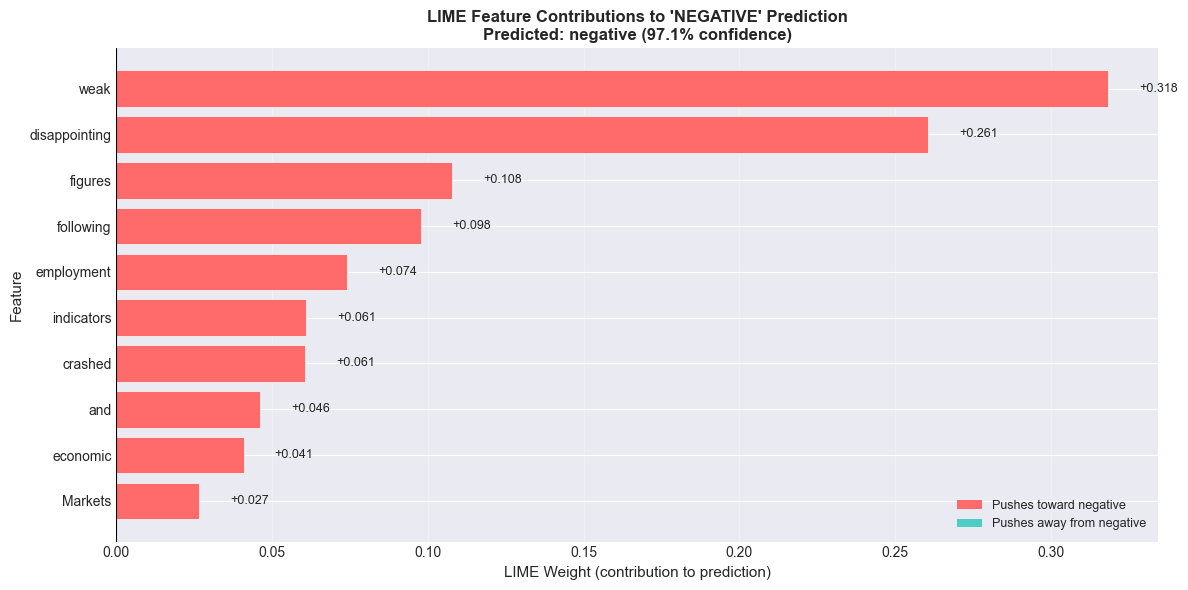

In [17]:
# Visualize
plot_lime_features(explanation_neg, figsize=(12, 6))

## Example 3: Neutral Sentiment

In [18]:
text_neutral = "The Federal Reserve announced its decision to maintain current interest rates"

# Generate explanation
explanation_neu = explainer.explain(text_neutral, num_features=10)

# Display prediction
pred = explanation_neu["prediction"]
print(f"Text: {text_neutral}")
print(f"Prediction: {pred['label'].upper()} ({pred['score']:.1%} confidence)")
print(f"\nTop features:")
for feature, weight in explanation_neu["top_features"][:5]:
    print(f"  {feature}: {weight:+.4f}")

Text: The Federal Reserve announced its decision to maintain current interest rates
Prediction: NEUTRAL (81.6% confidence)

Top features:
  rates: -0.0677
  interest: -0.0544
  decision: -0.0373
  announced: +0.0286
  Reserve: -0.0204


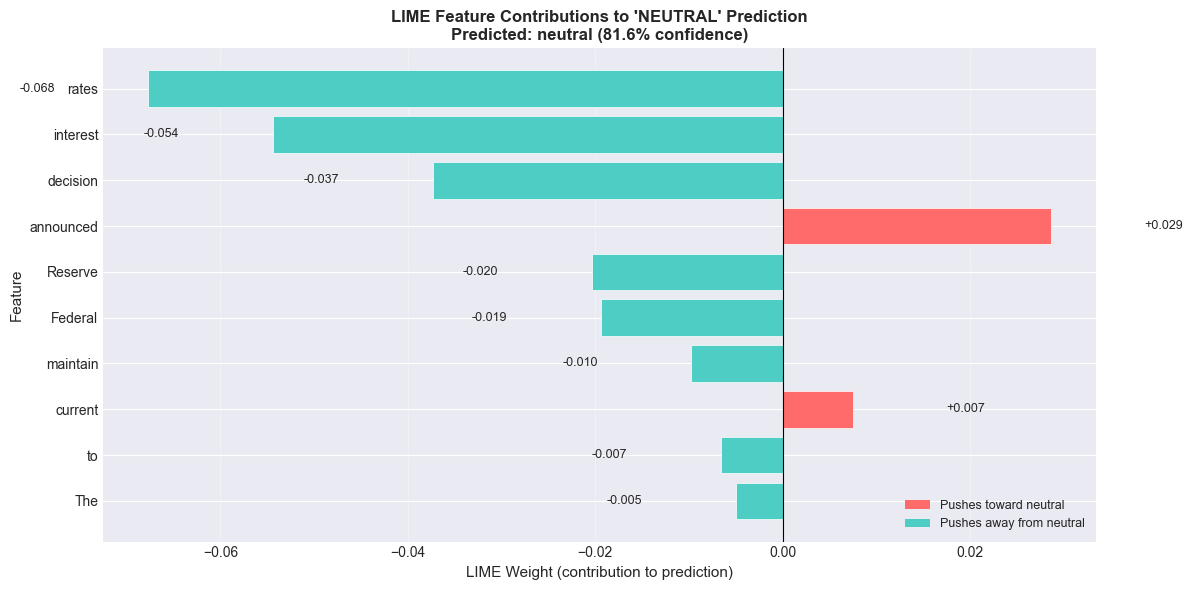

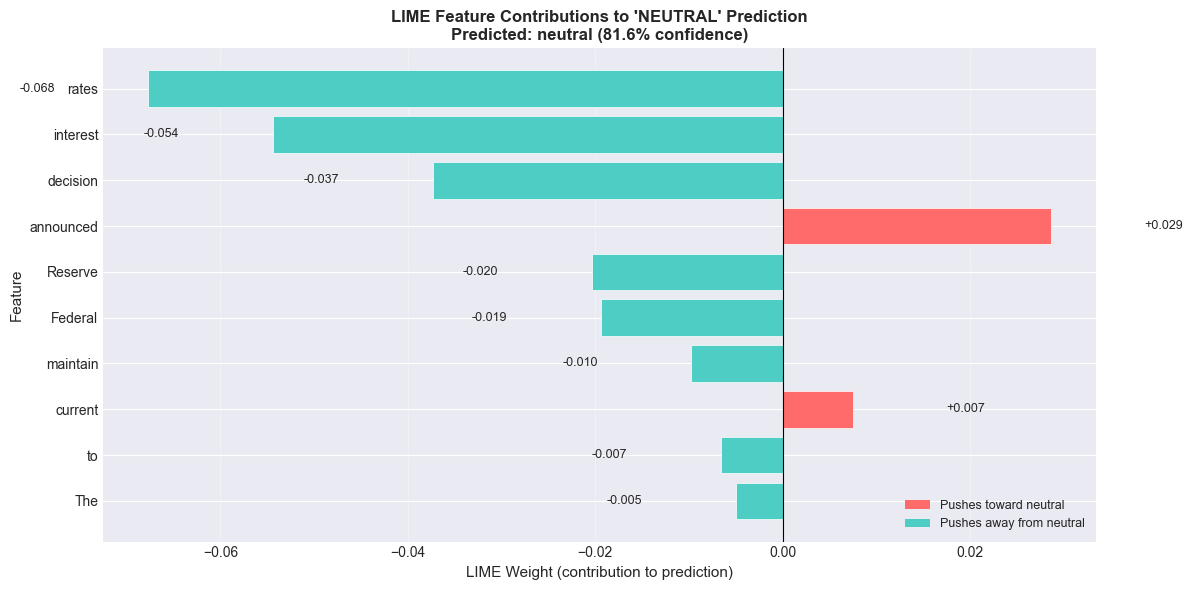

In [19]:
# Visualize
plot_lime_features(explanation_neu, figsize=(12, 6))

## Batch Analysis: Multiple Texts

In [20]:
# Define multiple texts for batch analysis
texts = [
    "Stock prices surged after earnings beat",
    "Market crashed on recession fears",
    "Investors cautious about economic outlook",
    "Revenue growth exceeded expectations",
    "Company announced major layoffs",
]

# Generate explanations
explanations = explainer.explain_batch(texts, num_features=10)

# Display results
for i, (text, exp) in enumerate(zip(texts, explanations), 1):
    if exp:
        pred = exp["prediction"]
        print(f"{i}. [{pred['label'].upper():8s}] {pred['score']:.1%} - {text}")
    else:
        print(f"{i}. [FAILED] - {text}")

1. [POSITIVE] 84.7% - Stock prices surged after earnings beat
2. [NEGATIVE] 92.2% - Market crashed on recession fears
3. [NEGATIVE] 59.8% - Investors cautious about economic outlook
4. [POSITIVE] 95.2% - Revenue growth exceeded expectations
5. [NEGATIVE] 96.5% - Company announced major layoffs


## Summary Analysis

In [21]:
# Get summary data
summary_data = explainer.get_summary_data(explanations, top_n=15)

print(f"Analyzed {summary_data['num_explanations']} texts")
print(f"\nTop 10 most important features overall:")
for feature, importance in summary_data['top_features'][:10]:
    print(f"  {feature}: {importance:.4f}")

Analyzed 5 texts

Top 10 most important features overall:
  layoffs: 0.8922
  surged: 0.6573
  exceeded: 0.6110
  crashed: 0.4310
  growth: 0.3904
  recession: 0.3735
  cautious: 0.3703
  expectations: 0.3656
  revenue: 0.3405
  market: 0.2992


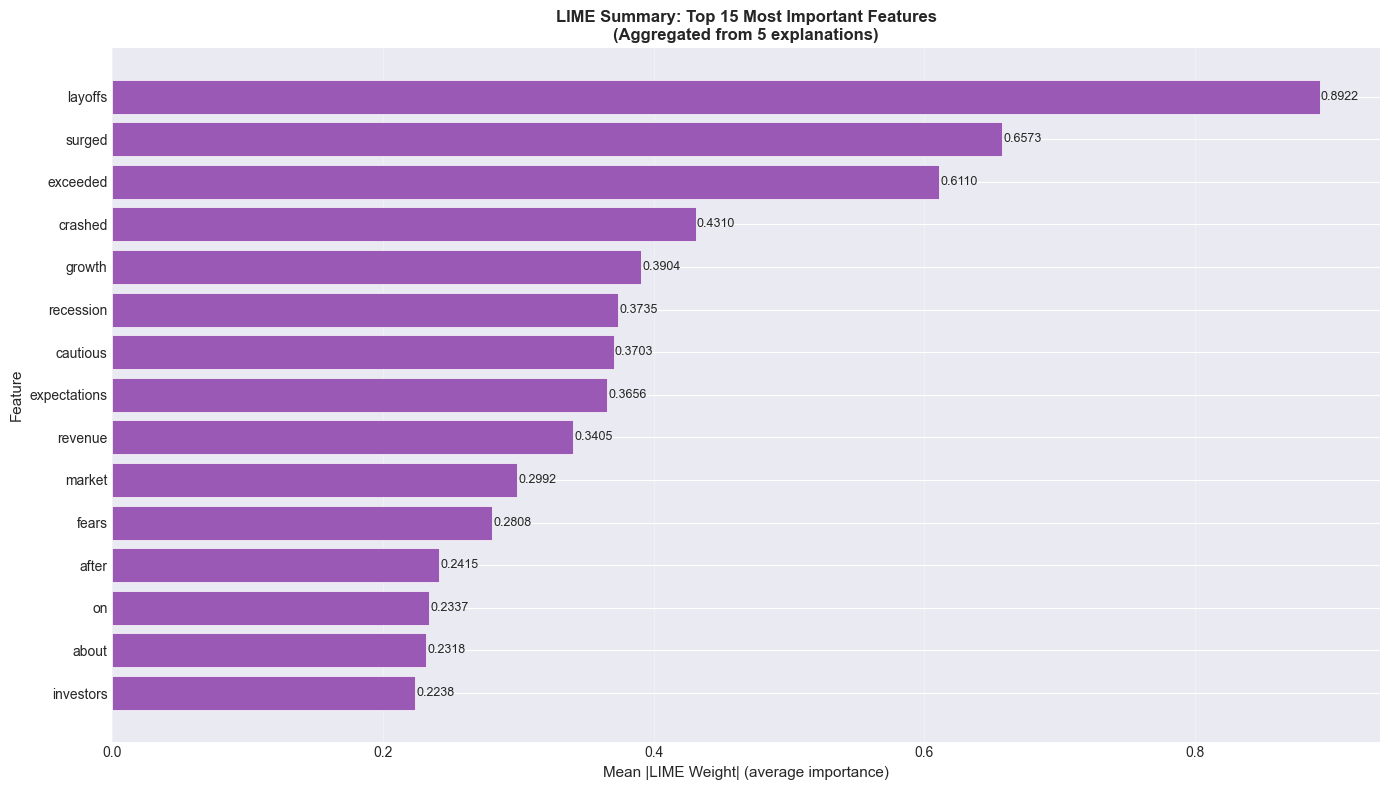

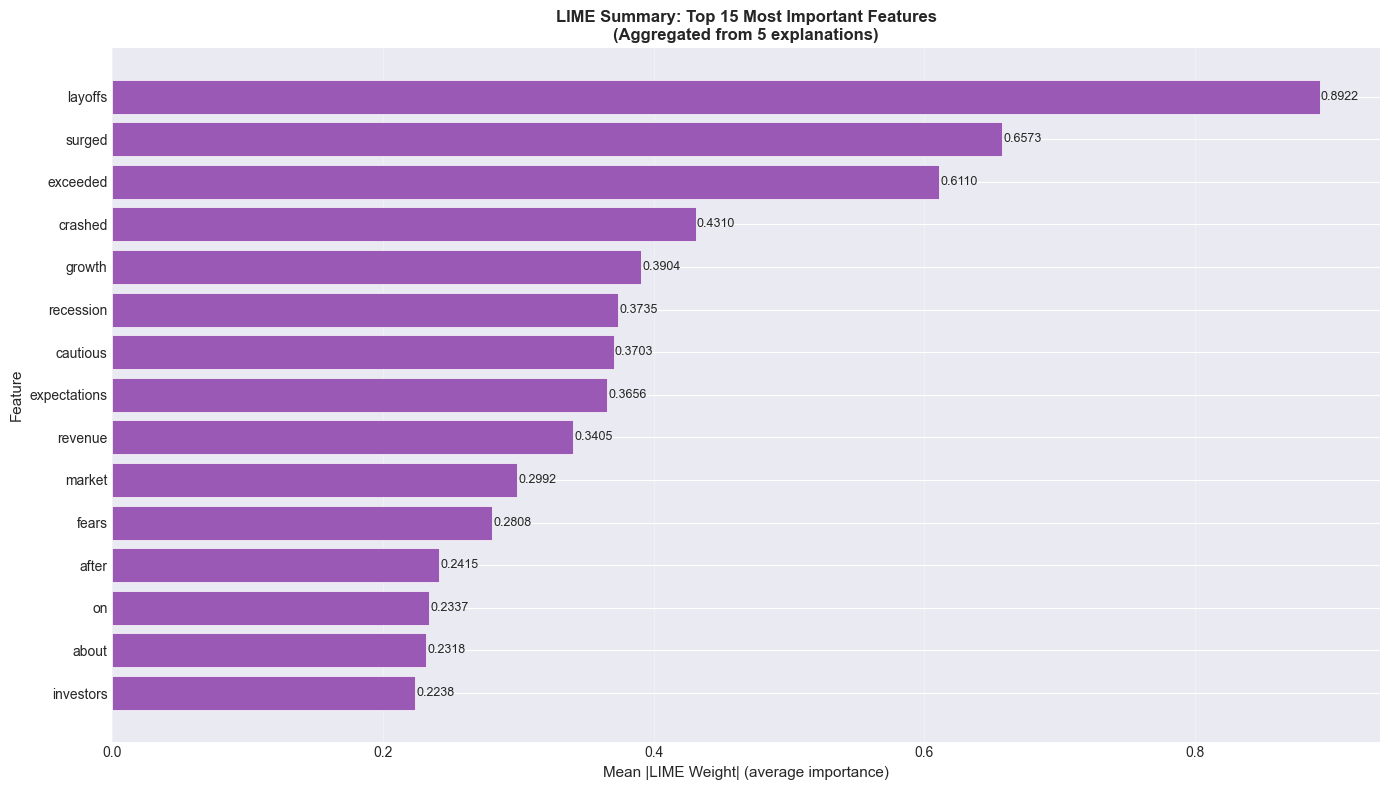

In [22]:
# Plot summary bar chart
plot_lime_summary_bar(summary_data, top_n=15, figsize=(14, 8))

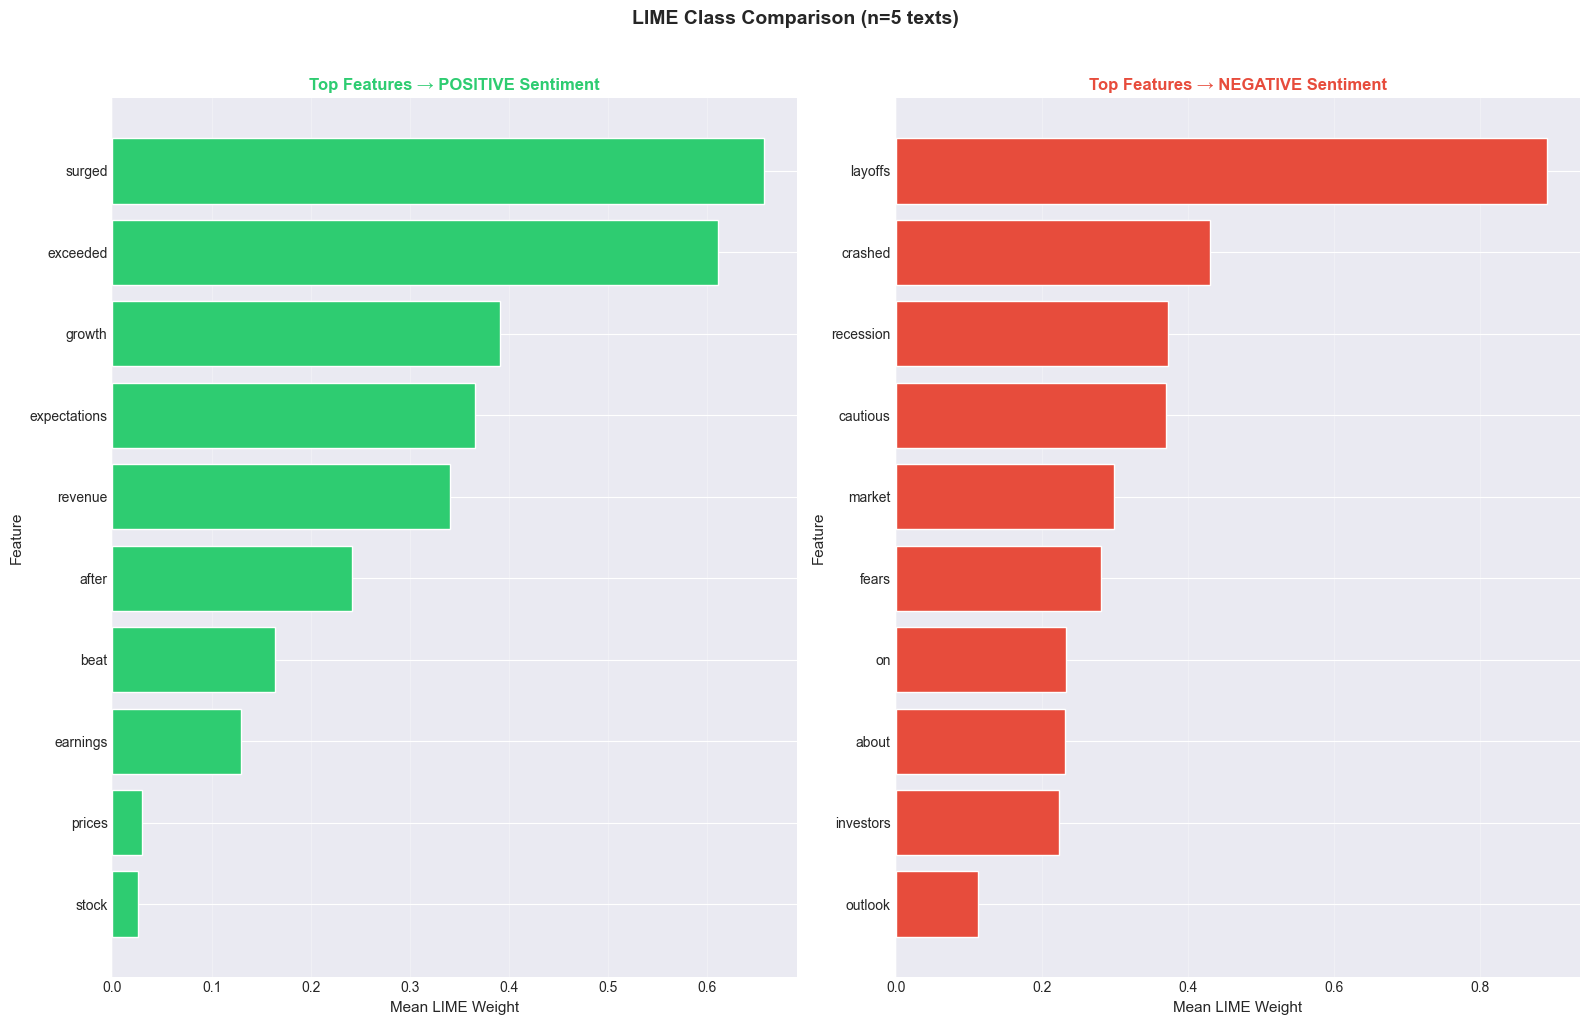

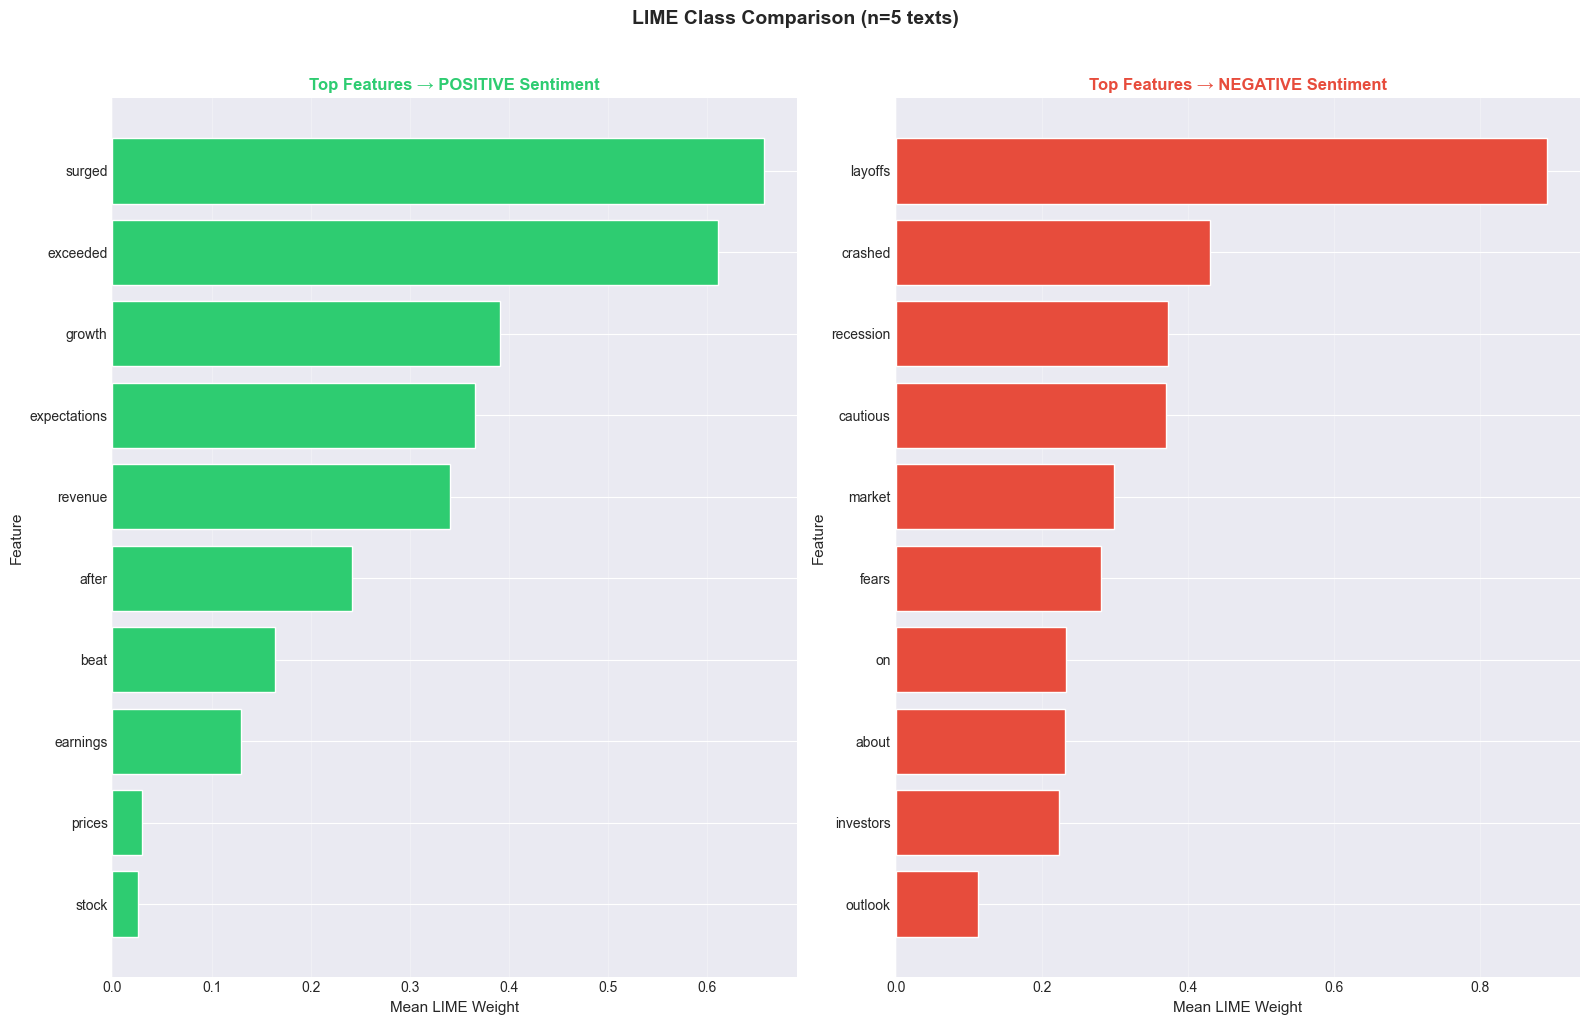

In [23]:
# Plot class comparison
plot_lime_class_comparison(summary_data, top_n=10, figsize=(16, 10))

## Export HTML Explanation

In [24]:
# Save an explanation as interactive HTML
output_path = Path("../data/processed/explanations/lime_example_interactive.html")
save_lime_html(explanation_pos, output_path)
print(f"Saved interactive HTML to: {output_path}")

Saved interactive HTML to: ..\data\processed\explanations\lime_example_interactive.html


## LIME vs SHAP Comparison

Compare LIME and SHAP explanations for the same text.

In [25]:
from app.explainability import get_explainer
from app.explainability.visualizations import plot_token_contributions

# Get SHAP explainer
shap_explainer = get_explainer()

# Same text for both
text = "Stock prices surged on positive earnings"

# Get explanations
lime_exp = explainer.explain(text, num_features=10)
shap_exp = shap_explainer.explain(text)

print("LIME Prediction:", lime_exp["prediction"]["label"].upper())
print("SHAP Prediction:", shap_exp["prediction"]["label"].upper())

LIME Prediction: POSITIVE
SHAP Prediction: POSITIVE


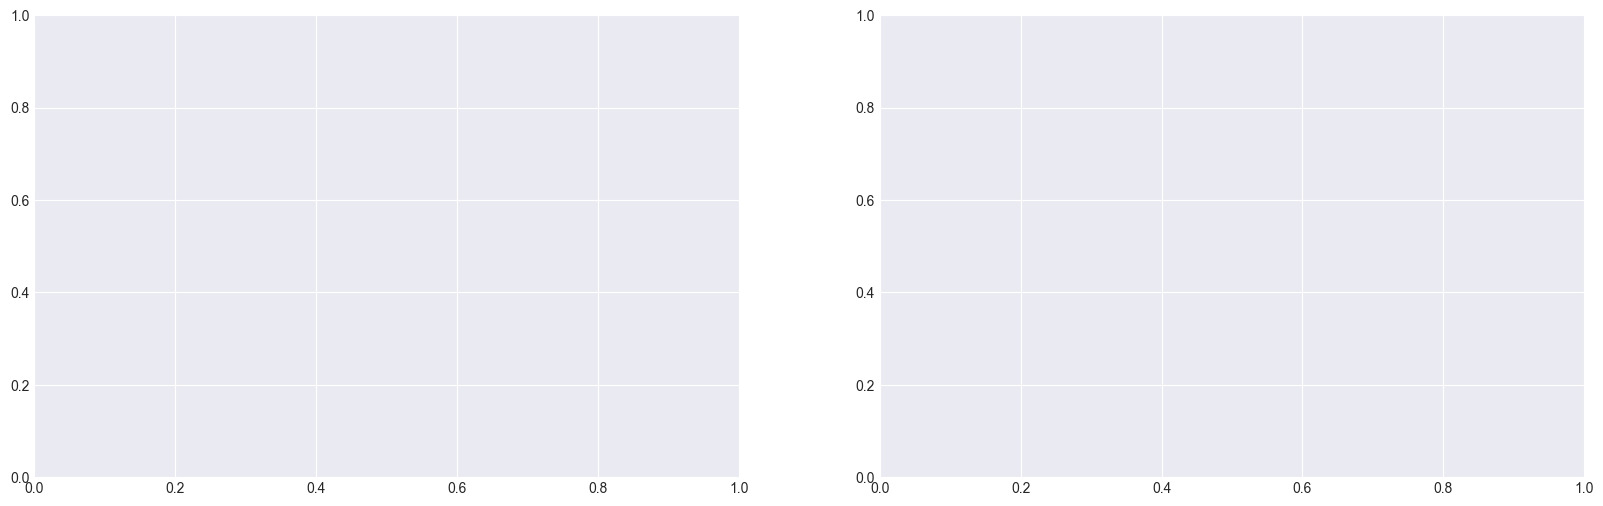

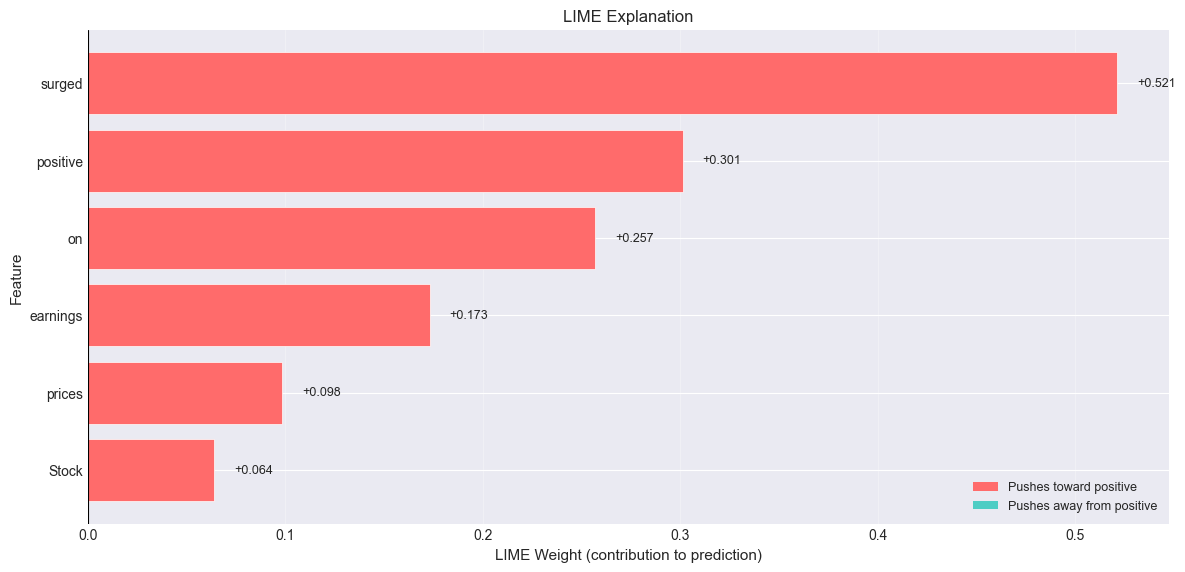

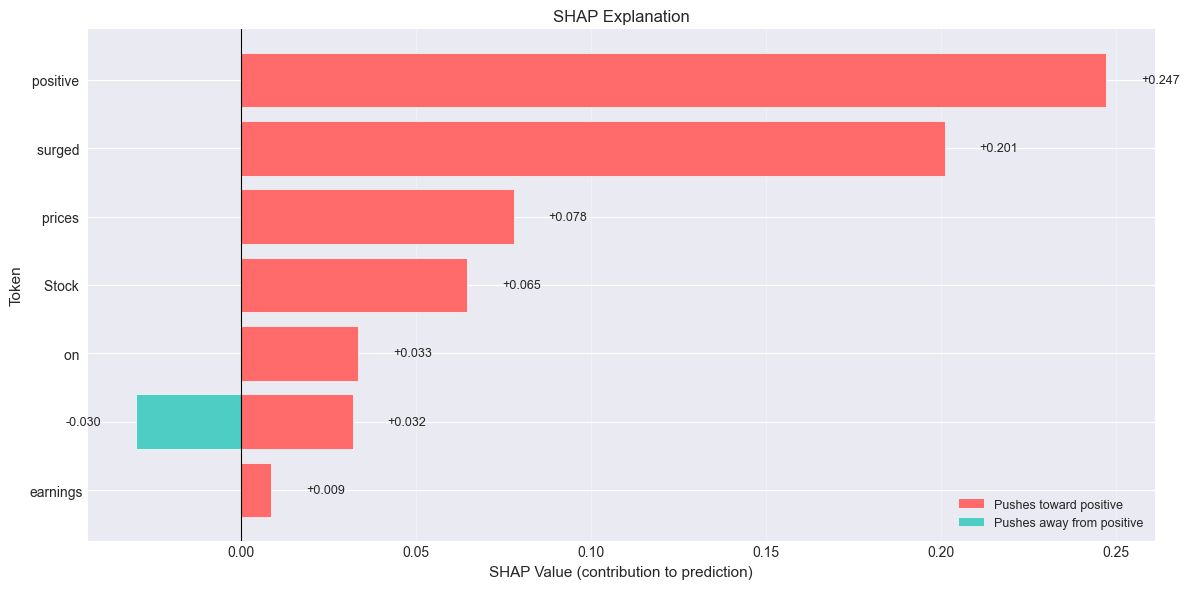

In [26]:
# Plot side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# LIME plot
plot_lime_features(lime_exp, show=False)
plt.title("LIME Explanation")

# SHAP plot
plot_token_contributions(shap_exp, show=False)
plt.title("SHAP Explanation")

plt.tight_layout()
plt.show()

## Conclusion

This notebook demonstrated:
- ✅ LIME explainer initialization
- ✅ Single text explanations (positive, negative, neutral)
- ✅ Batch explanations
- ✅ Summary visualizations
- ✅ Feature importance analysis
- ✅ HTML export for interactive exploration
- ✅ Comparison with SHAP

**FYP-159 Completed**: LIME integration provides token-level sentiment reasoning with visualizations.